<a href="https://colab.research.google.com/github/rigolabbe/desafioLATAMg69/blob/main/PRUEBA_FINAL_An%C3%A1lisis_estad%C3%ADstico_con_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# 1. Carga los datos y explóralos. Elimina los datos nulos o incorrectos


import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
data= pd.read_csv('/content/sample_data/cardio.csv');
#print(data["prevalentStroke"])

#verificmos si estos datos segun definicion de prueba son indicadores de 2 valores
print(data["sex"].value_counts())
print(data["currentSmoker"].value_counts())
print(data["prevalentStroke"].value_counts())
print(data["prevalentHyp"].value_counts())
print(data["diabetes"].value_counts())
print(data["TenYearCHD"].value_counts())
print(data["education"].value_counts())

print("La cantidad de valores Nulos en DF es : " , data.isnull().any().sum())
print("Se cantidad de filas duplicadas en DF es : " , data.duplicated().sum())
#borramos datos nulos y verificmos en data
data = data.dropna(axis=0)
print("La cantidad de valores Nulos en DF es : " , data.isnull().any().sum())



F    2419
M    1819
Name: sex, dtype: int64
No     2144
Yes    2094
Name: currentSmoker, dtype: int64
0    4213
1      25
Name: prevalentStroke, dtype: int64
0    2922
1    1316
Name: prevalentHyp, dtype: int64
0    4129
1     109
Name: diabetes, dtype: int64
0    3594
1     644
Name: TenYearCHD, dtype: int64
1.0    1720
2.0    1253
3.0     687
4.0     473
Name: education, dtype: int64
La cantidad de valores Nulos en DF es :  7
Se cantidad de filas duplicadas en DF es :  0
La cantidad de valores Nulos en DF es :  0


2. Escoge tres variables cuantitativas y realiza un análisis descriptivo de ellas,
utilizando indicadores y gráficos. ¿Cuaĺ presenta mayor dispersión?

In [6]:
#analisis descriptivo de  las 3 variables eseleccionadas
# edad, colesterol , glucose
promedio_age = data["age"].mean()
desv_std_age = data["age"].std()
min_age = data["age"].min()
max_age = data["age"].max()

promedio_col = data["totChol"].mean()
desv_std_col = data["totChol"].std()
min_col = data["totChol"].min()
max_col = data["totChol"].max()

promedio_glu = data["glucose"].mean()
desv_std_glu = data["glucose"].std()
min_glu = data["glucose"].min()
max_glu = data["glucose"].max()

print("El promedio(La Media) general de edad  es  " , promedio_age)
print("El desviacion estandard general de edad es  " , desv_std_age)
print("El valor minimo de edad es  " , min_age)
print("El valor maximo de edad es  " , max_age)

print("El promedio(La Media) general de colesterol es  " , promedio_col)
print("El desviacion estandard general de colesterol es  " , desv_std_col)
print("El valor minimo de colesterol  es  " , min_col)
print("El valor maximo de  colesterol es  " , max_col)

print("El promedio(La Media) general de nivel de glucosa es  " , promedio_glu)
print("El desviacion estandard general de nivel de glucosa es  " , desv_std_glu)
print("El valor minimo de  de nivel de glucosa es  " , min_glu)
print("El valor maximo de  de nivel de glucosa es  " , max_glu)


El promedio(La Media) general de edad  es   49.5574398249453
El desviacion estandard general de edad es   8.561133464288966
El valor minimo de edad es   32
El valor maximo de edad es   70
El promedio(La Media) general de colesterol es   236.87308533916848
El desviacion estandard general de colesterol es   44.09622332488066
El valor minimo de colesterol  es   113.0
El valor maximo de  colesterol es   600.0
El promedio(La Media) general de nivel de glucosa es   81.85612691466083
El desviacion estandard general de nivel de glucosa es   23.910127685830084
El valor minimo de  de nivel de glucosa es   40.0
El valor maximo de  de nivel de glucosa es   394.0


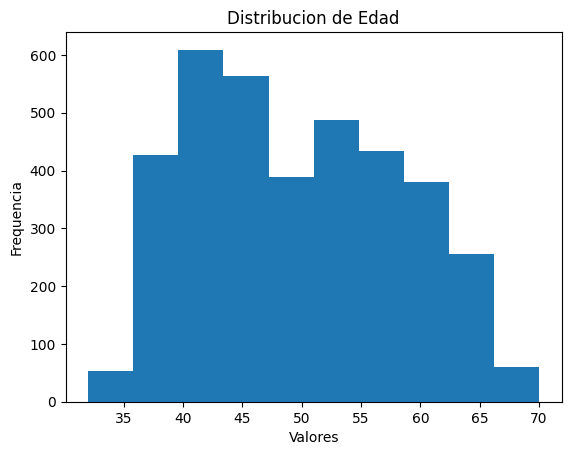

In [7]:
# crear graficos y un modelo  que nos diga como se comportan los datos.
# para crear este modelo necesitamos la media y la desviacion standard
dat_edad = data["age"]
# Graficando histograma
mu, sigma = promedio_age, desv_std_age # media y desvio estandar
# histograma de distribución normal.
peso = plt.hist(dat_edad)
plt.ylabel('Frequencia')
plt.xlabel('Valores')
plt.title('Distribucion de Edad')
plt.show()

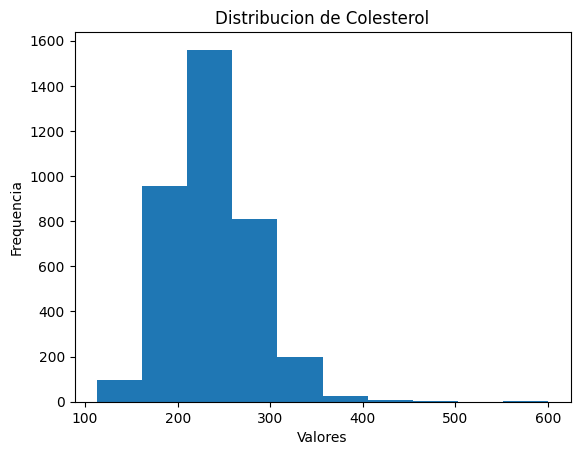

In [8]:
# crear graficos y un modelo  que nos diga como se comportan los datos.
# para crear este modelo necesitamos la media y la desviacion standard
dat_col = data["totChol"]
# Graficando histograma
mu, sigma = promedio_col, desv_std_col # media y desvio estandar
# histograma de distribución normal.
peso = plt.hist(dat_col)
plt.ylabel('Frequencia')
plt.xlabel('Valores')
plt.title('Distribucion de Colesterol')
plt.show()

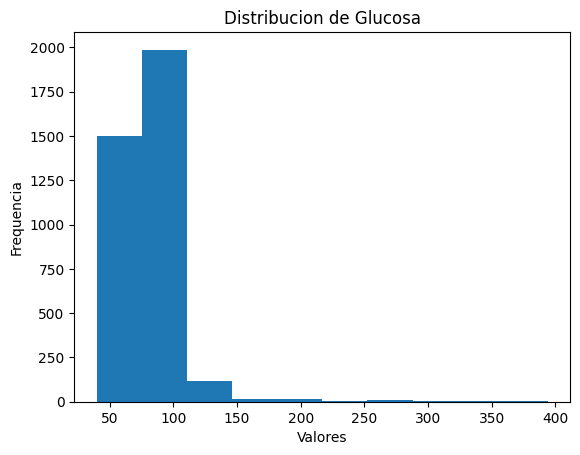

In [9]:
# crear graficos y un modelo  que nos diga como se comportan los datos.
# para crear este modelo necesitamos la media y la desviacion standard
dat_glu = data["glucose"]
# Graficando histograma
mu, sigma = promedio_col, desv_std_col # media y desvio estandar
# histograma de distribución normal.
peso = plt.hist(dat_glu)
plt.ylabel('Frequencia')
plt.xlabel('Valores')
plt.title('Distribucion de Glucosa')
plt.show()

3. Elimina los datos atípicos del dataset. Para las siguientes preguntas, considera el
dataset "limpio"

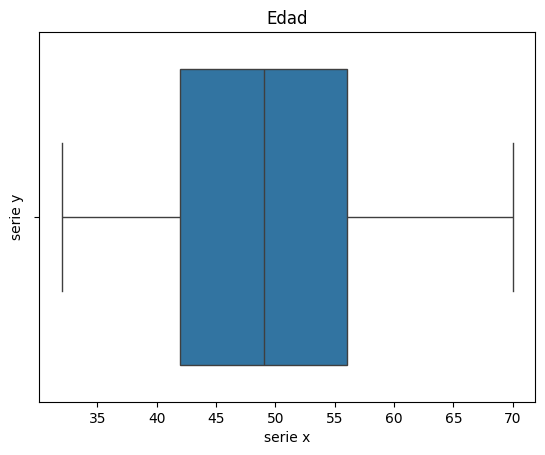

[42. 49. 56.]
32
70


In [10]:

#Se tomara la variables  Birth Rate y Fertility Rate donde se aprecia claramente algunos casos atipicos
#utilizando graficos  bloxplot o histograma   en histograma la cola larga son atipicos

sns.boxplot( x="age", data = data )
plt.title('Edad')
plt.xlabel('serie x')
plt.ylabel('serie y')
plt.show()

#rellenamos los datos faltantes por el valor promedio de los datos
data["age"].fillna(data["age"].mean(), inplace=True)

age = data["age"]

age_cuartiles = np.percentile(age, [25,50,75])
age_min = min(age)
age_max = max(age)

print(age_cuartiles)
print(age_min)
print(age_max)
# segun percentile y los valores presentados no se encuentran datos atipicos para EDAD


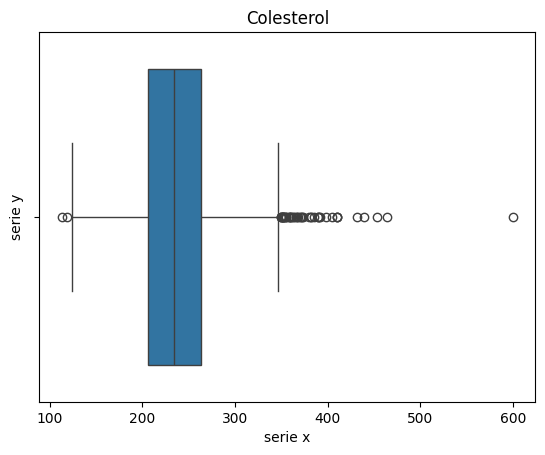

[206.   234.   263.25]
113.0
600.0
valores limite inferior  [113.0, 119.0]
limite inferior  120.125
limite superior  349.125
valores limite superior  [464.0, 352.0, 368.0, 370.0, 439.0, 398.0, 355.0, 353.0, 360.0, 352.0, 600.0, 392.0, 358.0, 391.0, 410.0, 372.0, 366.0, 410.0, 390.0, 405.0, 359.0, 350.0, 380.0, 355.0, 390.0, 371.0, 350.0, 354.0, 382.0, 364.0, 367.0, 352.0, 432.0, 351.0, 363.0, 382.0, 361.0, 453.0, 352.0, 410.0, 350.0, 358.0, 373.0, 385.0]


In [11]:
sns.boxplot( x="totChol", data = data )
plt.title('Colesterol')
plt.xlabel('serie x')
plt.ylabel('serie y')
plt.show()


#rellenamos los datos faltantes por el valor promedio de los datos
data["totChol"].fillna(data["totChol"].mean(), inplace=True)

col = data["totChol"]

col_cuartiles = np.percentile(col, [25,50,75])
col_min = min(col)
col_max = max(col)

print(col_cuartiles)
print(col_min)
print(col_max)
# segun percentile y los valores presentados SI se encuentran datos atipicos para CPLESTEROL

#obtenemos el rango intercuartil de la variable
iqr_col = col_cuartiles[2] - col_cuartiles[0]
# se toma primer cuartil y se resta 1.5 el rango intercuartil
# todo los valores que esten bajo  seran valores atipicos inferior cuartil 0
lim_infer_col = (col_cuartiles[0] - 1.5*iqr_col)

#se genera la lista de limite de valores inferiores
val_atipi_inf_col =[]
for valores in col:
  if valores < lim_infer_col:
    val_atipi_inf_col.append(valores)
print("valores limite inferior ", val_atipi_inf_col)

# SE ENCUENTRAN DATOS ATI´PICOS LIMITE INFERIOR

#valores atipicos limite superior cuartil 2

lim_super_col = (col_cuartiles[2] + 1.5*iqr_col)
print("limite inferior ", lim_infer_col)
print("limite superior ", lim_super_col)

#se genera la lista de limite de valores inferiores
val_atipi_sup_col =[]
for valores_col in col:
  if valores_col > lim_super_col:
    val_atipi_sup_col.append(valores_col)
print("valores limite superior ", val_atipi_sup_col)

#PRESENTA DATOS ATIPICOS  PARA LA VARIAABLE COLEESTEROL

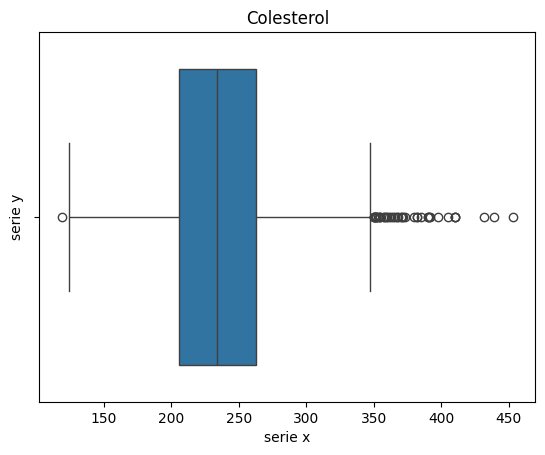

In [12]:
# realizamos los mismmos graficos ahora con datos rellenos y sin outliers
col_outliers =  data[(data['totChol'] > val_atipi_inf_col[0]) & (data['totChol'] < val_atipi_sup_col[0])]

#se realizan los graficos  a diferencia de anteriores ya no hay datos atipicos
sns.boxplot( x="totChol", data = col_outliers )
plt.title('Colesterol')
plt.xlabel('serie x')
plt.ylabel('serie y')
plt.show()

#QUITAMOS LOS DATOS ATIPIVOS DE ACUERDO A LOS LIMITES INFERIOR Y SYUPERIOR

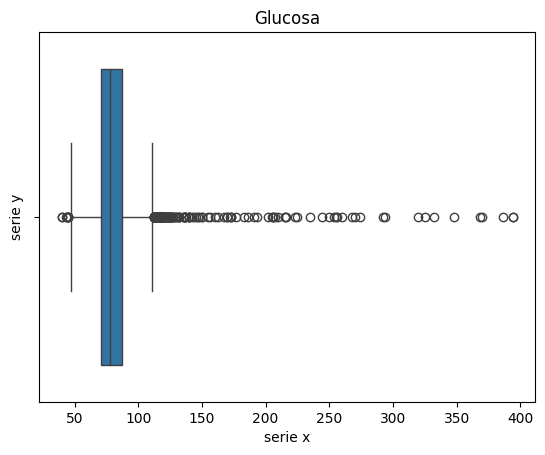

[71. 78. 87.]
40.0
394.0
valores limite inferior  [45.0, 45.0, 40.0, 44.0, 43.0, 44.0, 45.0, 45.0, 40.0]
limite inferior glu  47.0
limite superior glu  111.0
valores limite superior glu  [113.0, 225.0, 215.0, 202.0, 126.0, 120.0, 117.0, 132.0, 150.0, 120.0, 113.0, 115.0, 117.0, 113.0, 140.0, 112.0, 118.0, 113.0, 114.0, 160.0, 117.0, 115.0, 123.0, 145.0, 126.0, 118.0, 117.0, 120.0, 122.0, 137.0, 127.0, 205.0, 114.0, 115.0, 113.0, 118.0, 130.0, 118.0, 112.0, 120.0, 112.0, 216.0, 163.0, 113.0, 113.0, 112.0, 144.0, 116.0, 121.0, 172.0, 140.0, 124.0, 112.0, 126.0, 186.0, 223.0, 117.0, 325.0, 156.0, 268.0, 120.0, 122.0, 117.0, 274.0, 292.0, 118.0, 114.0, 112.0, 116.0, 114.0, 127.0, 120.0, 115.0, 115.0, 118.0, 255.0, 123.0, 136.0, 123.0, 206.0, 127.0, 131.0, 148.0, 120.0, 118.0, 132.0, 113.0, 173.0, 118.0, 126.0, 115.0, 206.0, 140.0, 386.0, 127.0, 121.0, 155.0, 215.0, 150.0, 147.0, 117.0, 123.0, 170.0, 115.0, 112.0, 112.0, 320.0, 132.0, 140.0, 170.0, 137.0, 254.0, 394.0, 394.0, 124.0, 270.0, 

In [13]:
sns.boxplot( x="glucose", data = data )
plt.title('Glucosa')
plt.xlabel('serie x')
plt.ylabel('serie y')
plt.show()



#rellenamos los datos faltantes por el valor promedio de los datos
data["glucose"].fillna(data["glucose"].mean(), inplace=True)

glu = data["glucose"]

glu_cuartiles = np.percentile(glu, [25,50,75])
glu_min = min(glu)
glu_max = max(glu)

print(glu_cuartiles)
print(glu_min)
print(glu_max)
# segun percentile y los valores presentados SI se encuentran datos atipicos para CPLESTEROL

#obtenemos el rango intercuartil de la variable
iqr_glu = glu_cuartiles[2] - glu_cuartiles[0]
# se toma primer cuartil y se resta 1.5 el rango intercuartil
# todo los valores que esten bajo  seran valores atipicos inferior cuartil 0
lim_infer_glu = (glu_cuartiles[0] - 1.5*iqr_glu)

#se genera la lista de limite de valores inferiores
val_atipi_inf_glu =[]
for valores in glu:
  if valores < lim_infer_glu:
    val_atipi_inf_glu.append(valores)
print("valores limite inferior ", val_atipi_inf_glu)

# SE ENCUENTRAN DATOS ATI´PICOS LIMITE INFERIOR

#valores atipicos limite superior cuartil 2

lim_super_glu = (glu_cuartiles[2] + 1.5*iqr_glu)
print("limite inferior glu ", lim_infer_glu)
print("limite superior glu ", lim_super_glu)

#se genera la lista de limite de valores inferiores
val_atipi_sup_glu =[]
for valores_glu in glu:
  if valores_glu > lim_super_glu:
    val_atipi_sup_glu.append(valores_glu)
print("valores limite superior glu ", val_atipi_sup_glu)
#PRESENTA DATOS ATIPICOS  PARA LA VARIAABLE GLUCODSA

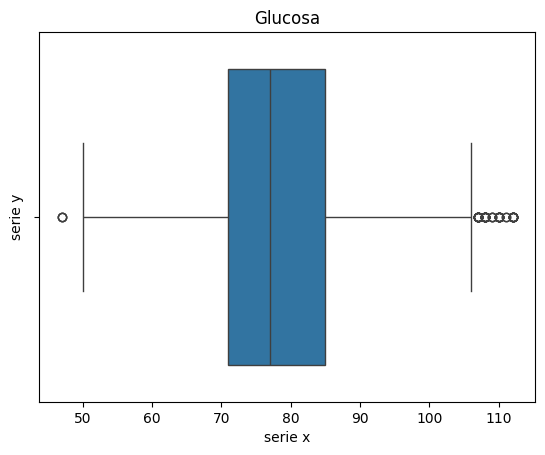

In [14]:
# realizamos los mismmos graficos ahora con datos rellenos y sin outliers
glu_outliers =  data[(data['glucose'] > val_atipi_inf_glu[0]) & (data['glucose'] < val_atipi_sup_glu[0])]

#se realizan los graficos  a diferencia de anteriores ya no hay datos atipicos
sns.boxplot( x="glucose", data = glu_outliers )
plt.title('Glucosa')
plt.xlabel('serie x')
plt.ylabel('serie y')
plt.show()

#QUITAMOS LOS DATOS ATIPIVOS DE ACUERDO A LOS LIMITES INFERIOR Y SYUPERIOR

4. ¿Qué variables cuantitativas presentan mayor correlación? Explica.

<ipython-input-15-53c5621b82e0>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_cardio.corr()


,age,cigsPerDay,totChol,sysBP,diaBP,BMI,glucose
age,1.000000,-0.189099,0.267764,0.388551,0.208880,0.137172,0.118245
cigsPerDay,-0.189099,1.000000,-0.030222,-0.094764,-0.056650,-0.086888,-0.053803
totChol,0.267764,-0.030222,1.000000,0.220130,0.174986,0.120799,0.049749
sysBP,0.388551,-0.094764,0.220130,1.000000,0.786727,0.331004,0.134702
diaBP,0.208880,-0.056650,0.174986,0.786727,1.000000,0.385611,0.063704
BMI,0.137172,-0.086888,0.120799,0.331004,0.385611,1.000000,0.083671
glucose,0.118245,-0.053803,0.049749,0.134702,0.063704,0.083671,1.000000


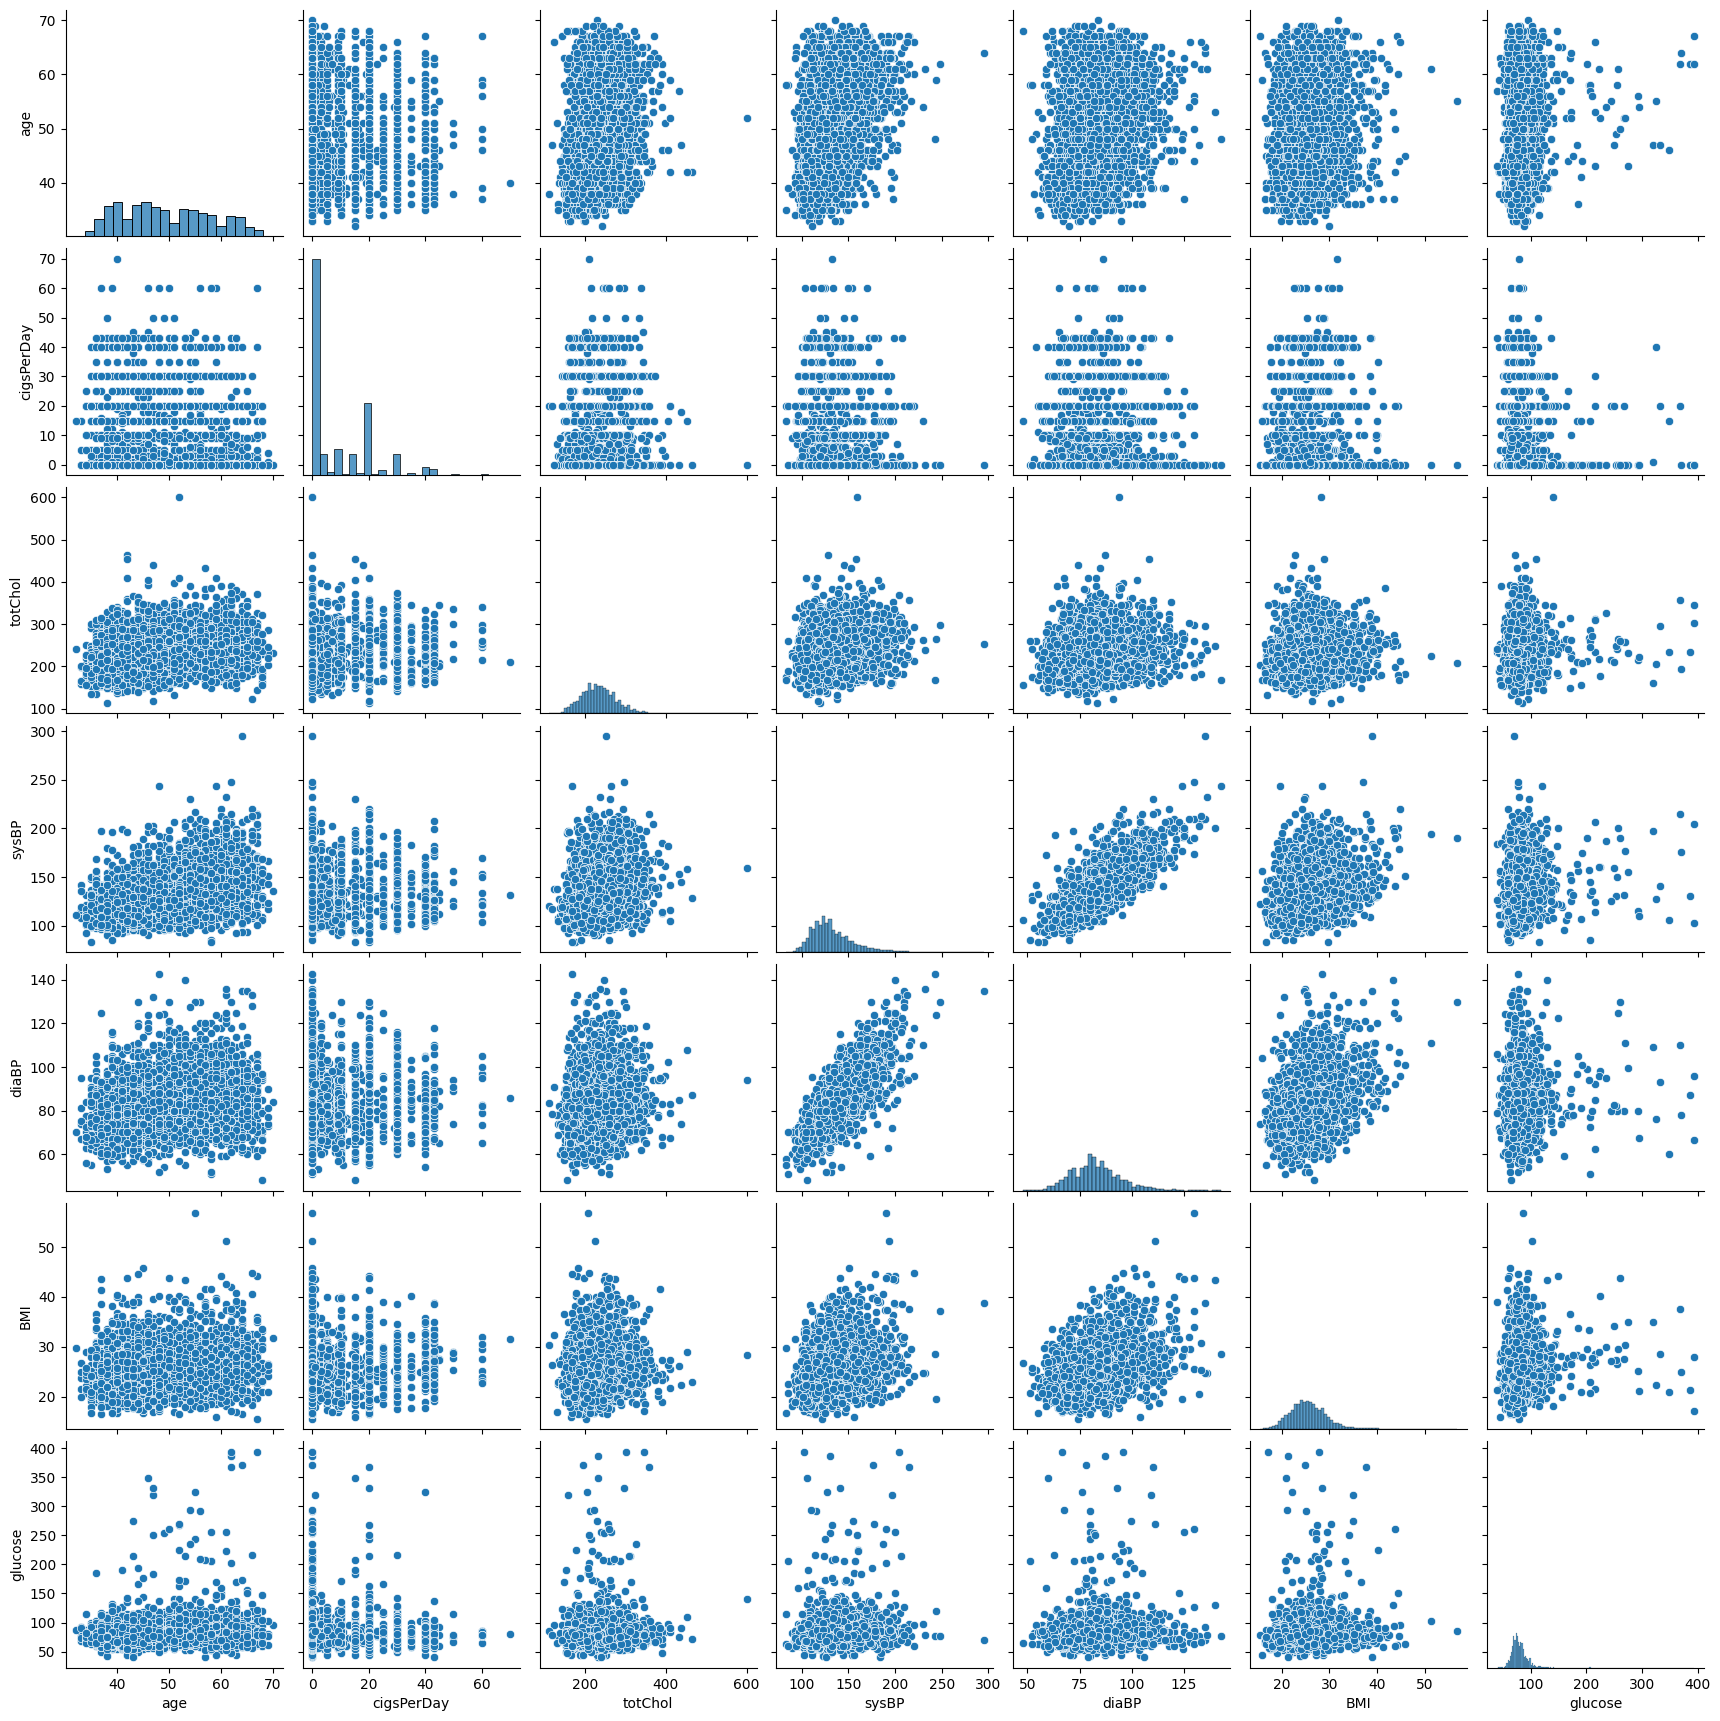

In [15]:
#Graficando variables
from matplotlib import pyplot as plt
import seaborn as sns

data_cardio = data.drop(labels=["education","currentSmoker", "BPMeds" , "prevalentStroke", "prevalentHyp", "diabetes","TenYearCHD","heartRate"], axis=1)

sns.pairplot(data_cardio)
data_cardio.corr()

# SEGUN LA INFORMACION LAS VARIABLES QUE PRESENTAN MAYOR CORRELACION ES
# sysBP: presión arterial sistólica
# diaBP_BMI: presión arterial diastólica  , con un valor de 0,78
# lo que significa que es positiva , cuanto más cerca esté el valor de +1 más fuerte es la relación entre las variables, en este caso la variable
# sysBP tiende a incrementar su valor cuando diaBP_BMI también aumenta

5. Si de este dataset se escoge un paciente al azar, ¿cuál es la probabilidad de que sea
hombre, si se sabe que pertenece al mayor cuartil de la variable correspondiente al
índice de masa corporal?

In [16]:
# BMI OBTENER EL QUARTIL DE ESTA VARIABLE
qs = data['BMI'].quantile([.25, .50, .75]).values
print(qs)
# SE AGREGAN AL DF LOS QUIARTILES PARA INDICAR A CUAL PERTENECE LA VARIABLE BMI
data["Q1 BMI"] =  (data['BMI'] <= qs[0])+0
data["Q2 BMI"] = ((data['BMI'] <= qs[1]) & (data['BMI'] > qs[0])) +0
data["Q3 BMI"] = ((data['BMI'] <= qs[2]) & (data['BMI']> qs[1])) +0
data["Q4 BMI"] = (data['BMI'] >qs[2]) +0

#EL CURTIL MAYOR ES > 28.04

#a. pertenecer a Europa, si se sabe que clasificó
p_H_y_Q4 =  len(data[(data["Q4 BMI"] == 1)  &  (data['sex']=='M')]) / len(data)
p_b = len(data[(data["Q4 BMI"] == 1)])  / len(data)

print("Probabilidad que  sea hombre , si se sabe que pertenece al msyor cuartil de BMI es : ", p_H_y_Q4 / p_b)




[23.08 25.38 28.04]
Probabilidad que  sea hombre , si se sabe que pertenece al msyor cuartil de BMI es :  0.4867549668874172


6. ¿Es razonable afirmar que, para una persona cualquiera (no necesariamente dentro
del dataset), su ritmo cardiaco promedio es 75? Explica y justifica.


In [17]:
import numpy as np
import scipy.stats as stats
from scipy.stats import norm
##test de hipotesis test TWO-SIDED
#                    formulando la hipotesis
# H0 : EL verdadero promedio de ritmo cardiaco para una persona cualquiera es igual a 75.  H0: u = 75
# H1 : EL verdadero promedio de ritmo cardiaco para una persona es distinto que 75.  H1: u <> 75

#Nivel de confianza al 95%  el alfa es alfa = 1 - 0.95  , alfa = 0.05

promedio_muestral = data['heartRate'].mean()
std_muestral = data['heartRate'].std()
totdatos = data['heartRate'].count()
z = 3.6

print("el promedio muestral de los riitmos cardiacos es : ", promedio_muestral)
print("la desviacion standar del  promedio muestral de los riitmos cardiacos es : ", std_muestral)
print("total de datos es : ", totdatos)

#stats.ttest_1samp(data['heartRate'],0)
# calculmos la probabilidad de z
p = norm.cdf(3.6)
print("p", p)

if p < 0.05:
  print("H0: x <  0.05 - con nivel de confianza del 95.0%, se rechaza la hipótesis nula" )
else:
  print("H0: x >  0.05 - con nivel de confianza del 95.0%, se acepta la hipótesis nula" )



el promedio muestral de los riitmos cardiacos es :  75.73057986870897
la desviacion standar del  promedio muestral de los riitmos cardiacos es :  11.982952108022788
totsl de datos es :  3656
p 0.9998408914098424
H0: x >  0.05 - con nivel de confianza del 95.0%, se acepta la hipótesis nula


7. Ser hombre, ¿influye en el promedio de cigarrillos consumidos por día, dentro de los
pacientes fumadores? Explica

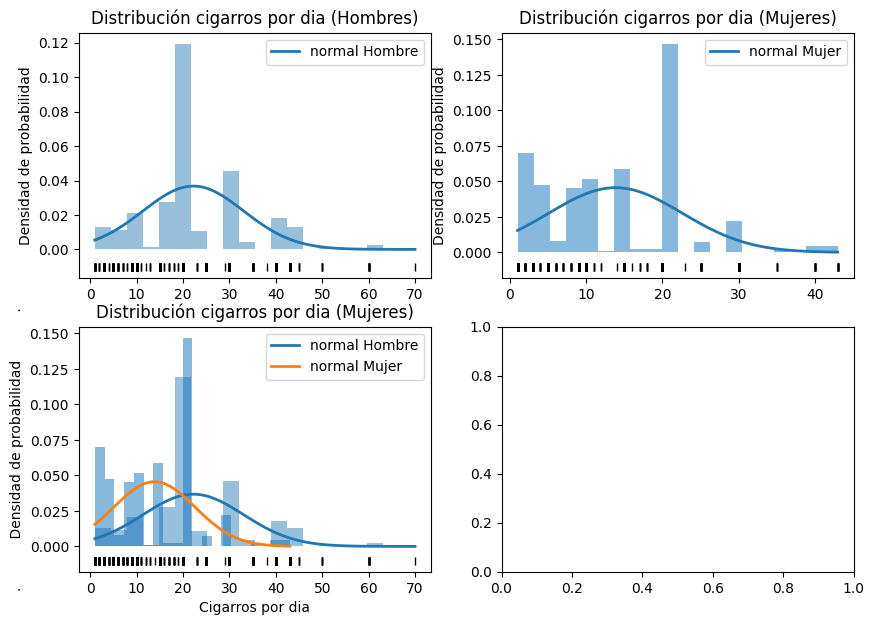

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

data_smoker = data[data['currentSmoker']=='Yes']
data_smoker.groupby('sex').size()

# Gráficos de distribución para hombres vs cigarros por dia
# ==============================================================================
fig, axs = plt.subplots(2, 2, figsize=(10, 7))

peso_sex_h = data_smoker.loc[data_smoker.sex == 'M', 'cigsPerDay']
#print("peso_smokers", peso_sex_h)
# Valores de la media (mu) y desviación típica (sigma) de cada grupo
mu, sigma = stats.norm.fit(peso_sex_h)

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(peso_sex_h), max(peso_sex_h), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico distribución
axs[0,0].plot(x_hat, y_hat, linewidth=2, label='normal Hombre')
axs[0,0].hist(x=peso_sex_h, density=True, bins=20, color="#3182bd", alpha=0.5)
axs[0,0].plot(peso_sex_h, np.full_like(peso_sex_h, -0.01), '|k', markeredgewidth=1)
axs[0,0].set_title('Distribución cigarros por dia (Hombres)')
axs[0,0].set_xlabel('')
axs[0,0].set_ylabel('Densidad de probabilidad')
axs[0,0].legend()


# Gráficos de distribución para Mujeres vs cigarros por dia
# =============================================================================
peso_sex_f = data_smoker.loc[data_smoker.sex == 'F', 'cigsPerDay']
#print("peso_smokers", peso_sex_f)
# Valores de la media (mu) y desviación típica (sigma) de cada grupo
mu, sigma = stats.norm.fit(peso_sex_f)

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(peso_sex_f), max(peso_sex_f), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico distribución
axs[0,1].plot(x_hat, y_hat, linewidth=2, label='normal Mujer')
axs[0,1].hist(x=peso_sex_f, density=True, bins=20, color="#1172bd", alpha=0.5)
axs[0,1].plot(peso_sex_f, np.full_like(peso_sex_f, -0.01), '|k', markeredgewidth=1)
axs[0,1].set_title('Distribución cigarros por dia (Mujeres)')
axs[0,1].set_xlabel('')
axs[0,1].set_ylabel('Densidad de probabilidad')
axs[0,1].legend()


# Gráficos de distribución para HOMBRES y MUJERES cigarros por dia
# ==============================================================================
#fig, axs = plt.subplots(2, 2, figsize=(10, 7))

peso_sex_h = data_smoker.loc[data_smoker.sex == 'M', 'cigsPerDay']
#print("peso_smokers", peso_sex_h)
# Valores de la media (mu) y desviación típica (sigma) de cada grupo
mu, sigma = stats.norm.fit(peso_sex_h)

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(peso_sex_h), max(peso_sex_h), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico distribución
axs[1,0].plot(x_hat, y_hat, linewidth=2, label='normal Hombre')
axs[1,0].hist(x=peso_sex_h, density=True, bins=20, color="#3182bd", alpha=0.5)
axs[1,0].plot(peso_sex_h, np.full_like(peso_sex_h, -0.01), '|k', markeredgewidth=1)
axs[1,0].set_title('Distribución cigarros por dia (Hombres)')
axs[1,0].set_xlabel('')
axs[1,0].set_ylabel('.          Densidad de probabilidad           .')
axs[1,0].legend()


# Gráficos de distribución para Mujeres vs cigarros por dia
# =============================================================================
peso_sex_f = data_smoker.loc[data_smoker.sex == 'F', 'cigsPerDay']
#print("peso_smokers", peso_sex_f)
# Valores de la media (mu) y desviación típica (sigma) de cada grupo
mu, sigma = stats.norm.fit(peso_sex_f)

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(peso_sex_f), max(peso_sex_f), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico distribución
axs[1,0].plot(x_hat, y_hat, linewidth=2, label='normal Mujer')
axs[1,0].hist(x=peso_sex_f, density=True, bins=20, color="#1172bd", alpha=0.5)
axs[1,0].plot(peso_sex_f, np.full_like(peso_sex_f, -0.01), '|k', markeredgewidth=1)
axs[1,0].set_title('Distribución cigarros por dia (Mujeres)')
axs[1,0].set_xlabel('Cigarros por dia')
axs[1,0].set_ylabel('.           Densidad de probabilidad           .')
axs[1,0].legend()







In [153]:
# Test de normalidad
# ==============================================================================

import pingouin as pg
#pg.normality(data=data_smoker, dv='sex', group='currentSmoker')

# Test para datos independientes (p-value, intervalos de confianza)
# ==============================================================================
peso_sex_h = data_smoker.loc[data_smoker.sex == 'M', 'cigsPerDay']
peso_sex_f = data_smoker.loc[data_smoker.sex == 'F', 'cigsPerDay']

#peso_smokers = datos.loc[datos.smoke == 'smoker', 'weight']
#peso_nonsmokers = datos.loc[datos.smoke == 'nonsmoker', 'weight']

pg.ttest(x=peso_sex_h, y=peso_sex_f, alternative='two-sided', correction=False)

#Dado que p-value (1.3760) es menor que el nivel de significancia alpha (8.56) ,
#la evidencia indica que si  existe una diferencia real en el
#promedio de cigarrillos consumidos por día, cuando son hombres


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,17.679938,1786,two-sided,1.376084e-64,"[7.44, 9.3]",0.84022,8.561e+60,1.0


#Dado que p-value (1.3760) es menor que el nivel de significancia alpha (8.56) , #la evidencia indica que si  existe una diferencia real en el #promedio de cigarrillos consumidos por día, cuando son hombres

8. Construye un modelo de regresión lineal que permita relacionar 6 variables del
dataset con el índice de masa corporal. (Debes incluir al menos dos variables
cualitativas). Evalúa tu modelo y explica.


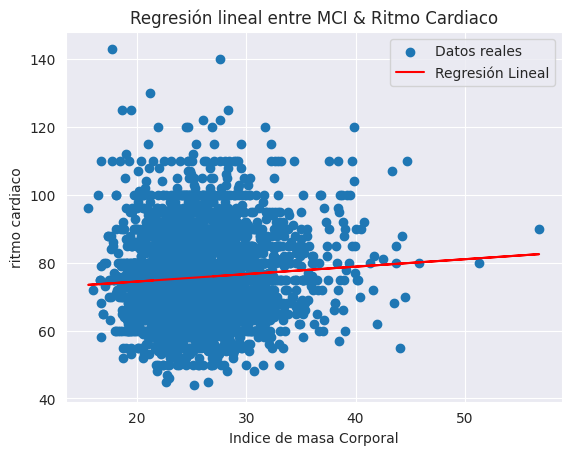

                            OLS Regression Results                            
Dep. Variable:              heartRate   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     20.34
Date:                Sun, 18 Feb 2024   Prob (F-statistic):           6.69e-06
Time:                        23:28:45   Log-Likelihood:                -14257.
No. Observations:                3656   AIC:                         2.852e+04
Df Residuals:                    3654   BIC:                         2.853e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         70.0768      1.269     55.217      0.0

In [191]:
#para las variables cualitativas no se peuden ingresar directamenet al modelo , ordinaly  o one hot encoding
#l s vsrisble a édecir es el BMI(target) ,  incluir  metrica RMSE  se debe  interpretar que tan desviado esta el promedio
# de las predicciones
#otro dato

import statsmodels.api as sm
data.head()
data.describe()
# Se definenn las variables para predecir (X) y la variable de respuesta (y)
X = data["BMI"]
y = data["heartRate"]
#y1 = data["age"]
#y2 = data["currentSmoker"]
#y3 = data["cigsPerDay"]
#y4 = data["totChol"]
#y5 = data["heartRate"]

# Se agrega la constante al predictor (la intercepcion)
X = sm.add_constant(X)

# Se crea modelo de regresión lineal
model = sm.OLS(y5, X).fit()

# Graficar la regresión lineal
plt.scatter(data["BMI"], data["heartRate"], label="Datos reales")
plt.plot(data["BMI"], model.predict(X), color='red', label="Regresión Lineal")
plt.title("Regresión lineal entre MCI & Ritmo Cardiaco")
plt.xlabel("Indice de masa Corporal")
plt.ylabel("ritmo cardiaco")
plt.legend()
plt.show()

print(model.summary())


El coeficiente de determinacion R , 0.006 indica que no hay una correlacion entre MCI y ritmo cardiaco

In [193]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#sns.set_style("darkgrid")
nuevo = data[["BMI","age","cigsPerDay","totChol", "heartRate"]] #,
#g=sns.pairplot(nuevo, hue="BMI", diag_kind="hist")

#for ax in g.axes.flat:
#  plt.setp(ax.get_xticklabels(), rotation=45)

bmi = data["BMI"].values   # target Y
age = data["age"].values
cigsPerDay = data["cigsPerDay"].values
totChol = data["totChol"].values
heartRate = data["heartRate"].values

X=np.array([age, cigsPerDay, totChol, heartRate]).T
Y=np.array(bmi)

reg=LinearRegression()
reg=reg.fit(X,Y)
Y_pred = reg.predict(X)
error=np.sqrt(mean_squared_error(Y,Y_pred))
r2=reg.score(X,Y)
print("error es , " , error)
print("el valor de r2 es," , r2)
print("los coeficinetes son : \n'" , reg.coef_)

#los coeficientes son muy lejanos a 1  por lo que indica que no hay correlacion de las variables
#con el MCI

#el valor de r es muy lejanp a 1 confirmando que no existe correlacion

error es ,  3.9924964821299027
el valor de r2 es, 0.03552317071650579
los coeficinetes son : 
' [ 0.04818458 -0.02376376  0.00782839  0.0241587 ]
